# **Beijing multii-site air quality prediction**

This data challenge was made by students of the Master 2 Data Science at Ecole Polytechnique for the data camp:

<img src="img/IPP.jpg">

$ \textit{Authors : } $

The data used for this challenge is the Beijing Multi-Site Air-Quality:

    Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

<img src="img/UCI.jpg">

## **Introduction**

###  **Problem statement**

#### **Worlwide air pollution**


Air pollution is a major environmental concern, with detrimental effects on human health and the environment. Among various air pollutants, fine particulate matter (PM2.5) has been identified as a significant contributor to air pollution-related health problems. PM2.5 refers to tiny particles in the air that can be inhaled into the lungs, causing respiratory and cardiovascular problems, as well as contributing to other health problems such as asthma, chronic bronchitis, and heart disease.

Air pollution is a leading cause of premature deaths and health problems worldwide. According to the World Health Organization (WHO), outdoor air pollution is responsible for an estimated 4.2 million deaths annually.In addition to its impact on human health, air pollution also has a significant economic cost, including healthcare expenses, lost productivity, and environmental damage. Therefore, addressing air pollution is a critical public health and environmental challenge, requiring effective policies and actions to reduce emissions and promote clean energy and sustainable development.


#### **Goverment and data driven solution** :

Governments worldwide have implemented various policies and initiatives to combat air pollution and promote clean air. Some of these include emission standards for vehicles and industrial sources, incentives for clean energy and public transportation, and measures to reduce outdoor burning and open waste disposal. International agreements like the Paris Agreement and the Sustainable Development Goals also aim to reduce greenhouse gas emissions and promote sustainable development. However, to effectively tackle air pollution, it's crucial to continuously monitor and assess air quality and identify effective strategies for emission reduction. The use of meteorological data can play a critical role in achieving this. By leveraging meteorological data and advanced analytics, we can gain valuable insights into air pollution patterns, identify sources and hotspots of pollution, and evaluate the effectiveness of policy interventions. Ultimately, by using data-driven solutions, we can address air pollution and promote a cleaner and healthier environment for all.

Meteorological factors, such as temperature, humidity, wind speed, and precipitation, play a crucial role in the formation, dispersion, and transport of PM2.5. Therefore, predicting PM2.5 levels based on meteorological data can provide valuable insights for air quality management and public health protection.


## Getting started with the RAMP starting kit

### Software prerequisites

This starting kit requires the following dependencies:

* `numpy`
* `pandas`
* `request`
* `scikit-learn`
* `matplolib`
* `ramp`
* `jupyter`
* `seaborn`
* `plotly`

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## **Data**

## **Description and utility for the challenge**
For this challenge, participants will be using meteorological data from different stations in Beijing, which will be merged to create a comprehensive dataset. This is important because air pollution levels can vary significantly across different areas of a city, depending on factors such as traffic density, industrial activity, and weather patterns. By combining data from multiple stations, we can capture this variation and obtain a more accurate representation of air quality across the city. The merged dataset will include various meteorological variables such as temperature, humidity, wind speed, and precipitation, as well as PM2.5 concentrations, which will serve as the target variable for the predictive model. Participants will be tasked with developing a model that can accurately predict PM2.5 concentrations based on the available meteorological data, with the ultimate goal of identifying effective strategies for air pollution reduction and promoting public health and environmental sustainability. 

<br>
<center>
<img src="img/beijing.jpg" height=400px widht=700px>
</center>


The csv files of the data from the different stations are first merged to obtain a new table with all the data. It is sorted in chronological order.

Then, the data from the 'wd' column regarding the wind direction (North North West, East, etc.) are converted into degrees in order to facilitate their manipulation (e.g. to calculate averages or to visualize the data).

The data are then divided into a training set of the first data in chronological order (2/3) and a test set of the last data (last 1/3).

Then, we check the presence of missing values, we calculate the median values on the columns of the training set (except for the column 'NO2' where we take the average value) and we replace the missing values on the training and test sets by these values on the corresponding columns.

Finally, we remove the redundant or useless columns such as 'No' and the columns concerning a temporal statement because the data are now already indexed on the date (year - month - day - hour), in chronological order.

### Getting the data

The data can be downloaded by running:

    python download_data.py

In [6]:
!run download_data.py

Data already downloaded
Merged data already exists at {merged_data_file}


In [3]:
from problem import get_train_data

data_train, labels_train = get_train_data()

In [7]:
data_train.shape

(280512, 17)

In [10]:
data_train.head()

,Date-time,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,2013,3,1,0,18.0,5.0,159.707174,800.0,88.0,0.1,1021.1,-18.6,0.0,306.220462,4.4,Gucheng
1,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,7.000000,300.0,77.0,-0.7,1023.0,-18.8,0.0,329.238194,4.4,Aotizhongxin
2,2013-03-01 00:00:00,2013,3,1,0,6.0,4.0,8.000000,300.0,81.0,-0.5,1024.5,-21.4,0.0,329.238194,5.7,Tiantan
3,2013-03-01 00:00:00,2013,3,1,0,4.0,3.0,174.033550,200.0,82.0,-2.3,1020.8,-19.7,0.0,85.286949,0.5,Dingling
4,2013-03-01 00:00:00,2013,3,1,0,7.0,3.0,2.000000,100.0,91.0,-2.3,1020.3,-20.7,0.0,301.830178,3.1,Huairou


In [13]:
labels_train

array([ 6.,  4.,  6., ..., 63., 55., 48.])


## **Features**

- **year**: year of data in this row
- **month**: month of data in this row
- **day**: day of data in this row
- **hour**: hour of data in this row
- **PM2.5**: PM2.5 concentration (ug/m$^3$) (This will be our target)
- **PM10**: PM10 concentration (ug/m$^3$)
- **SO2**: SO2 concentration (ug/m$^3$)
- **NO2**: NO2 concentration (ug/m$^3$)
- **CO**: CO concentration (ug/m$^3$)
- **O3**: O3 concentration (ug/m$^3$)
- **TEMP**: temperature (degree Celsius)
- **PRES**: pressure (hPa)
- **DEWP**: dew point temperature (degree Celsius)
- **RAIN**: precipitation (mm)
- **wd**: wind direction
- **WSPM**: wind speed (m/s)
- **station**: name of the air-quality monitoring site

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date-time  280512 non-null  object 
 1   year       280512 non-null  int64  
 2   month      280512 non-null  int64  
 3   day        280512 non-null  int64  
 4   hour       280512 non-null  int64  
 5   PM10       280512 non-null  float64
 6   SO2        280512 non-null  float64
 7   NO2        280512 non-null  float64
 8   CO         280512 non-null  float64
 9   O3         280512 non-null  float64
 10  TEMP       280512 non-null  float64
 11  PRES       280512 non-null  float64
 12  DEWP       280512 non-null  float64
 13  RAIN       280512 non-null  float64
 14  wd         280512 non-null  float64
 15  WSPM       280512 non-null  float64
 16  station    280512 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 36.4+ MB


Note that the data has no missing values. We use the `.describe()` method to display descriptive statistics that provide a summary of a dataset's distribution, including measures of central tendency, dispersion, and shape. 

In [21]:
data_train[[col for col in data_train.columns if col not in ['No', 'year', 'month', 'day', 'hour']]].describe()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000,280512.000000
mean,105.406720,17.753706,54.242038,1152.813224,60.565993,15.090202,1009.172454,4.016434,0.065810,156.783015,1.680927
std,87.207135,23.892452,39.099003,984.356990,57.423377,10.858715,9.937458,13.530829,0.841598,106.929674,1.238769
min,2.000000,0.285600,1.026500,100.000000,0.214200,-14.500000,982.400000,-43.400000,0.000000,2.729349,0.000000
25%,39.000000,3.000000,24.000000,500.000000,14.994000,6.000000,1001.300000,-7.100000,0.000000,67.641978,0.900000
50%,86.000000,8.000000,45.000000,900.000000,48.000000,16.800000,1008.600000,5.900000,0.000000,153.222816,1.400000
75%,147.000000,22.000000,75.000000,1400.000000,86.000000,23.900000,1016.600000,16.000000,0.000000,245.475760,2.200000
max,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1038.000000,29.100000,72.500000,329.238194,13.200000


In [22]:
df = data_train.copy()

In [23]:
# Converting the index as date-time format
df['fulldate'] = pd.to_datetime(df["Date-time"])

# Adding the hours
df['fulldate'] +=  pd.to_timedelta(df.hour, unit='h')

# Index
df = df.set_index('fulldate')

df.head()

,Date-time,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
fulldate,,,,,,,,,,,,,,,,,
2013-03-01,2013-03-01 00:00:00,2013,3,1,0,18.0,5.0,159.707174,800.0,88.0,0.1,1021.1,-18.6,0.0,306.220462,4.4,Gucheng
2013-03-01,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,7.000000,300.0,77.0,-0.7,1023.0,-18.8,0.0,329.238194,4.4,Aotizhongxin
2013-03-01,2013-03-01 00:00:00,2013,3,1,0,6.0,4.0,8.000000,300.0,81.0,-0.5,1024.5,-21.4,0.0,329.238194,5.7,Tiantan
2013-03-01,2013-03-01 00:00:00,2013,3,1,0,4.0,3.0,174.033550,200.0,82.0,-2.3,1020.8,-19.7,0.0,85.286949,0.5,Dingling
2013-03-01,2013-03-01 00:00:00,2013,3,1,0,7.0,3.0,2.000000,100.0,91.0,-2.3,1020.3,-20.7,0.0,301.830178,3.1,Huairou


As we see, for a given date, we are given the data for different stations in Beijing.

## Visualization

### For a given station

Let us focus on a given station and visualize the features in the data. We will do a daily, weekly, and monthly averaging of the data.

In [24]:
df_Wanliu = df[df["station"] == "Wanliu"]
df_Wanliu = df_Wanliu.drop(['station', 'year', 'month', 'day', 'hour', 'Date-time'], axis=1)

df_Wanliu.head()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
fulldate,,,,,,,,,,,
2013-03-01 00:00:00,8.0,6.0,28.000000,400.0,52.0,-0.7,1023.0,-18.8,0.0,329.238194,4.4
2013-03-01 02:00:00,9.0,6.0,28.000000,400.0,50.0,-1.1,1023.2,-18.2,0.0,2.729349,4.7
2013-03-01 04:00:00,6.0,12.0,19.000000,400.0,55.0,-1.1,1023.5,-18.2,0.0,329.238194,5.6
2013-03-01 06:00:00,30.0,8.0,14.000000,900.0,33.0,-1.4,1024.5,-19.4,0.0,306.220462,3.1
2013-03-01 08:00:00,13.0,9.0,133.611381,300.0,54.0,-2.0,1025.2,-19.5,0.0,2.729349,2.0


In [25]:
df_daily = df_Wanliu.resample('D').mean()
df_weekly = df_daily.resample('W').mean()
df_monthly = df_daily.resample('M').mean()

<Figure size 1500x1500 with 0 Axes>

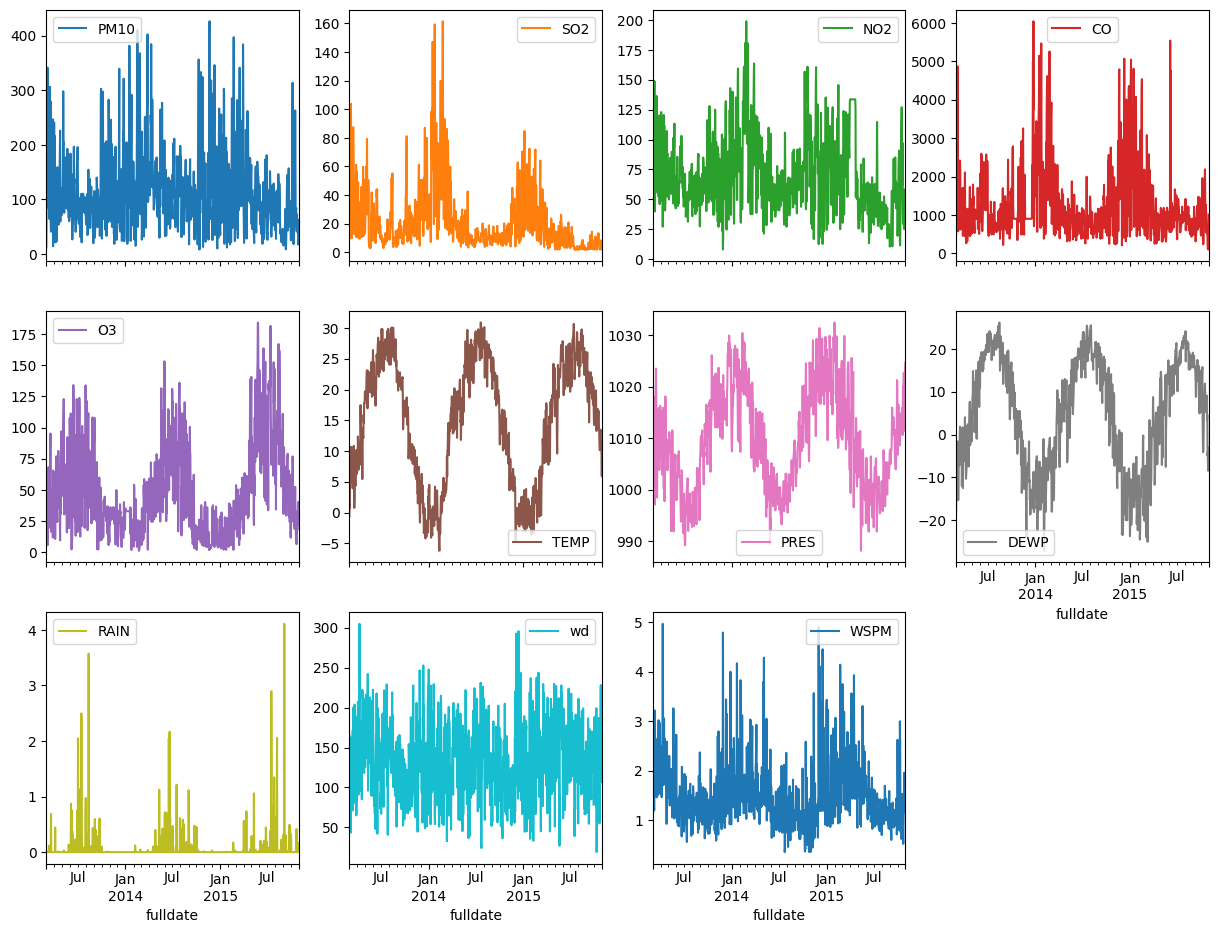

In [26]:
# Daily visualization
plt.figure(figsize = (15, 15))
df_daily.plot(subplots=True, layout=(4,4), figsize = (15,15))
plt.show()

<Figure size 1500x1500 with 0 Axes>

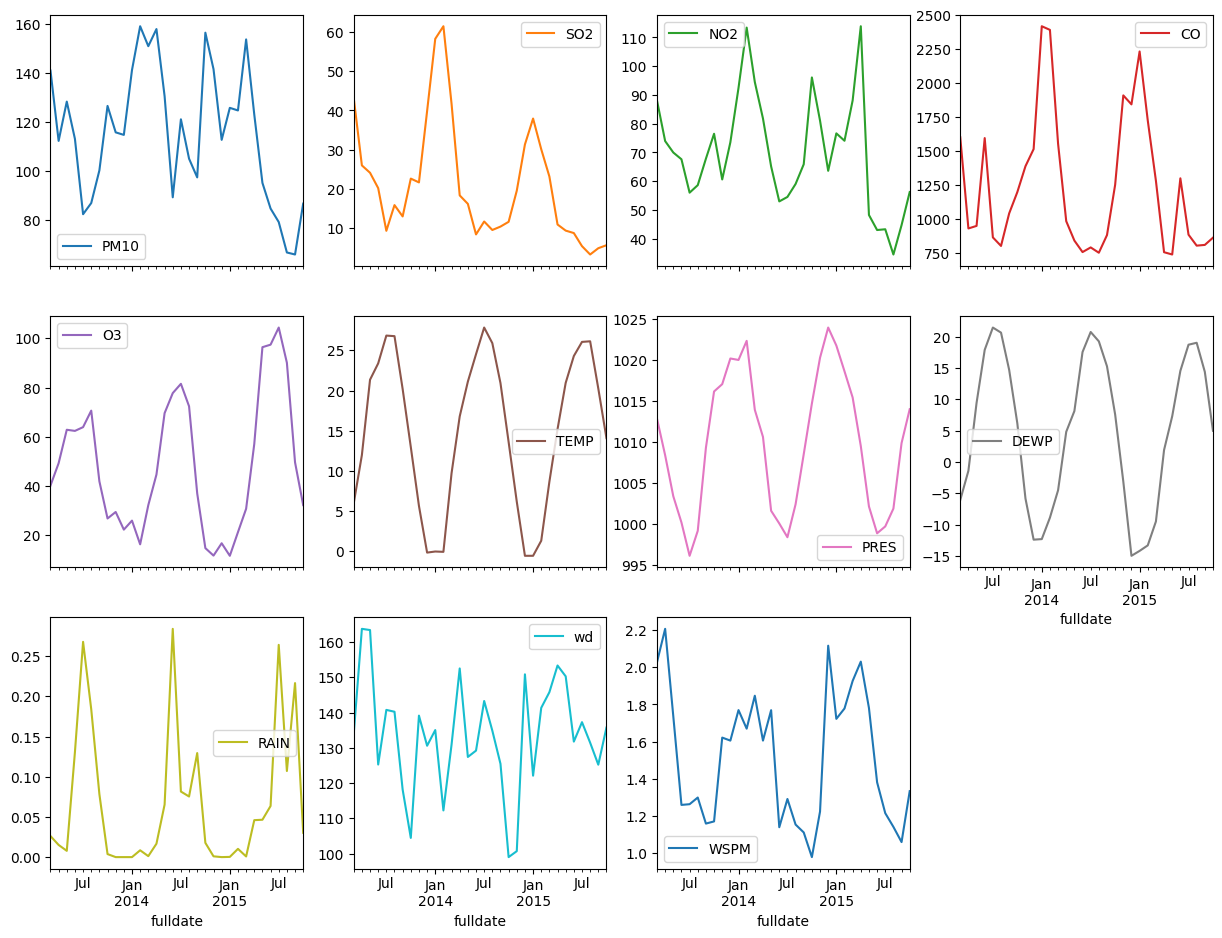

In [27]:
# Monthly visualization
plt.figure(figsize = (15, 15))
df_monthly.plot(subplots=True, layout=(4,4), figsize = (15,15))
plt.show()

After plotting the daily mean of the data, we can detect some patterns. They get more clear when plotting the monthly means of the data: there appears to be an annnual seasonnality. It is natual for the temperature that varies periodically with the passing of seasons. Same goes for the RAIN. All of this tells us that it might be interesting to look at the data under a time series angle.

## Target visualization

The target variable / label of the data is the PM2.5, an indicator measuring the quantity of fine particulate matter in the air.

We can do a quick vizualisation of the target in one station.

Text(0.5, 1.0, 'Target variable across time')

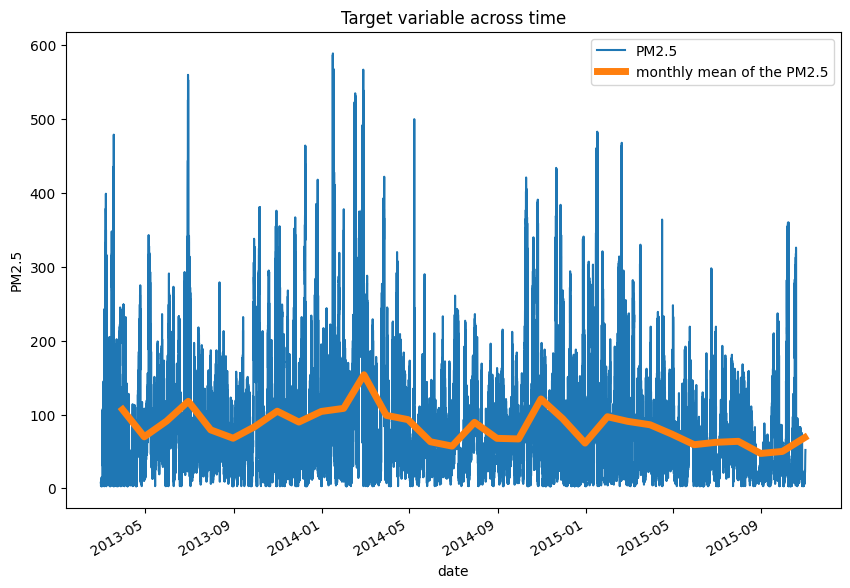

In [28]:
df["target"]= labels_train
df_Wanliu = df[df["station"] == "Wanliu"]
df_daily = df_Wanliu.resample('D').mean()
df_monthly = df_daily.resample('M').mean()

df_Wanliu["target"].plot(figsize=(10,7), label = "PM2.5")
df_monthly["target"].plot(figsize=(10,7), lw = 5, label="monthly mean of the PM2.5")
plt.xlabel("date")
plt.ylabel("PM2.5")
plt.legend()
plt.title("Target variable across time")

Now, let's look at how the target behaves across the years, months, hours in a day and days of the week for the different stations. To have a general look at the data, we use the median. You can zoom in and out in the plot and choose one or more stations to analyze the data. 

**(Below: interactive plotly plots that cannot be displayed on github and have to be run locally)**

In [29]:
col = 'year'
fig = px.line(df[[col, "target", "station"]].groupby([col, "station"]).median().reset_index(),
              x=col,
              y="target",
              color="station",
              color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_xaxes(tickvals=[2013, 2014, 2015,], ticktext=["2013", "2014", "2015"])
fig.update_layout(
    title={
        'text': "Median value of PM2.5 by station over time per " + str(col),
        'x': 0.5,
        'y': 0.95, # adjust the y-coordinate to move the title up or down
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title=str(col))
fig.update_yaxes(title="PM2.5")
fig.show()

In [30]:
col = 'month'
fig = px.line(df[[col, "target", "station"]].groupby([col, "station"]).median().reset_index(),
              x=col,
              y="target",
              color="station",
              color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(
    title={
        'text': "Median value of PM2.5 by station over time per " + str(col),
        'x': 0.5,
        'y': 0.95, # adjust the y-coordinate to move the title up or down
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title=str(col))
fig.update_yaxes(title="PM2.5")
fig.show()

In [31]:
col = 'hour'
fig = px.line(df[[col, "target", "station"]].groupby([col, "station"]).mean().reset_index(),
              x=col,
              y="target",
              color="station",
              color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_xaxes(
    tickmode = 'linear',
    dtick = 2
)
fig.update_layout(
    title={
        'text': "Median value of PM2.5 by station over time per " + str(col),
        'x': 0.5,
        'y': 0.95, # adjust the y-coordinate to move the title up or down
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title=str(col))
fig.update_yaxes(title="PM2.5")
fig.show()

In [32]:
df['day_week'] = pd.to_datetime(df['Date-time']).dt.day_name()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_week'] = pd.Categorical(df['day_week'], categories=ordered_days, ordered=True)

col = 'day_week'
fig = px.line(df[[col, "target", "station"]].groupby([col, "station"]).median().reset_index(),
              x=col,
              y="target",
              color="station",
              color_discrete_sequence=px.colors.qualitative.Bold)
fig.update_layout(
    title={
        'text': "Median value of PM2.5 by station over time per day of the week",
        'x': 0.5,
        'y': 0.95, # adjust the y-coordinate to move the title up or down
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title='day of the week')
fig.update_yaxes(title="PM2.5")
fig.show()

We can see that, for each variable, all stations tend to behave similarly through time. In the first plot by year, we see that fine dust values have tended to decrease as years passed. As for the months, February is the month with the highest amount of fine dust and August has the least amount. As for the hours, we see that there is a small peak at 10 a.m. and finally at 11 p.m. is where there the values go up. Finally, by day of the week, it is on Fridays and Saturdays where the values are highest. We also see a small decrease on Wednesdays in most stations. It should be clarified that although this initial analysis is useful to get an idea of the data, it should be verified that biases (caused by imbalanced data, for example) do not affect the analysis and the understanding obtained from the information given by the plots. 

Finally, we show a correlation plot of the numerical variables:

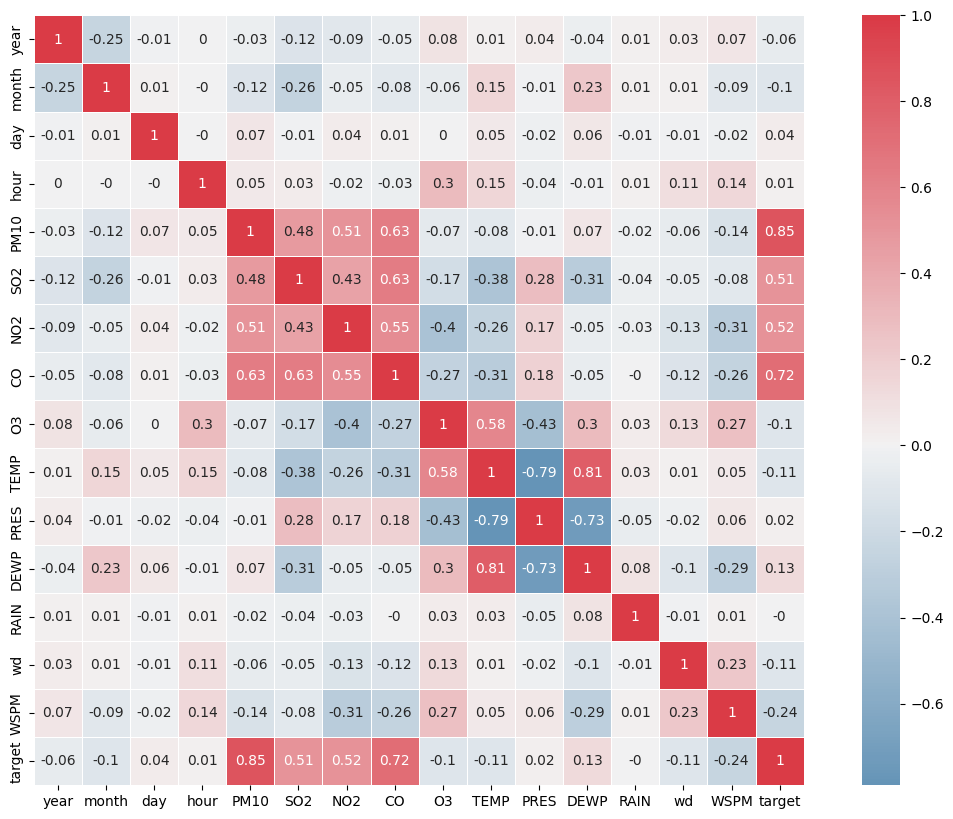

In [33]:
#Correlation map for the Wanliu station

corr_map = round(df.corr(), 2) 
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(corr_map, cmap=cmap, annot=True, vmax=1, center=0,
            square=True, linewidth=.5);

As we see, the target variable is highly correlated to the PM10, SO2, NO2, CO and O3 features. They will likely be the most relevant features during the modeling. However, since PM10 is highly related to PM2.5, we should not use it in our modelization.

On the other hand, the features RAIN and hour have very low correlation with the target. They might not be relevant.

## A first model

Let's try a first pipeline on our data. We are using a standard scaler on the numerical columns, and a one-hot encoder on the categorical column.

In [34]:
from problem import get_test_data

data_train, labels_train = get_train_data()
data_test, labels_test = get_test_data()

In [35]:
data_train['Date-time'] = pd.to_datetime(data_train["Date-time"])
data_test['Date-time'] = pd.to_datetime(data_test["Date-time"])

# .... or you might want to remove the feature altogether 

data_train = data_train.drop("Date-time", axis=1)
data_test = data_test.drop("Date-time", axis=1)


In [36]:
# Basic pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_cols = ["station"]
num_cols = ["month", "day", "hour", 
            "TEMP", "PRES", "DEWP", "RAIN", "wd", "WSPM"]

cat_pipeline = Pipeline([
    ("Encoder", OneHotEncoder(handle_unknown='ignore')) 
])

num_pipeline = Pipeline([
    ("Scaler", StandardScaler()),
])

preprocessing = ColumnTransformer([
    ("categorical_preproc", cat_pipeline, cat_cols),
    ("numerical_preproc", num_pipeline, num_cols)
])

model = Pipeline([
    ("Pre-processing", preprocessing),
    ("Regression", RandomForestRegressor(n_estimators=100))
])

In [37]:
model.fit(data_train, labels_train)
model.score(data_test, labels_test)

0.23908555565516754

## Ramp submission

In [40]:
!ramp-test --submission starting_kit  --quick-test      # to test the submission locally

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Testing Quality of Air
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score    R2         MSE      time
	train  0.96    383.2046  0.335697
	valid -0.54   6344.8595  0.044202
	test  -0.04  12803.2260  0.041139
CV fold 1
	score    R2         MSE      time
	train  0.96    304.4243  0.360394
	valid -2.97  11559.6280  0.059867
	test  -0.05  12903.4224  0.045060
CV fold 2
	score    R2         MSE      time
	train  0.95    292.9598  0.512880
	valid -0.77   7232.0251  0.053315
	test  -0.01  12405.5433  0.053882
CV fold 3
	score    R2         MSE      time
	train  0.94    350.1265  0.687771
	valid -1.62   8322.5655  0.057841
	test  -0.02  12578.3766  0.042179
CV fold 4
	score    R2         MSE      time
	train  0.93    341.0822  0.792237
	valid -0